In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return math.pow(np.e, math.pow(-x, 3)) - math.pow(x, 4) - np.sin(x)

def f_prime(x):
    return -3 * math.pow(x, 2) * math.pow(np.e, math.pow(-x, 3)) - 4 * math.pow(x, 3) - np.cos(x)

ERR_TOLERANCE = 0.5 * math.pow(10, -4)
r = 0.641583

In [3]:
# Method 1: Bisection Method

a = -1
b = 1
x = (a+b) / 2
iteration_count = 0

while (abs((b - a)/2) >= ERR_TOLERANCE):
    if (f(a) * f(x) < 0):
        b = x
    else:
        a = x

    x = (a+b) / 2
    iteration_count += 1

print("Found r = {} in {} iterations".format(x, iteration_count))

Found r = 0.641571044921875 in 15 iterations


In [4]:
# Method 2: Newton's Method

x_0 = 0
prev_x_0 = float('inf')
iteration_count = 0

while (abs(prev_x_0 - x_0) >= ERR_TOLERANCE):
    prev_x_0 = x_0
    x_0 = x_0 - (f(x_0) / f_prime(x_0))
    iteration_count += 1

print("Found r = {} in {} iterations".format(x_0, iteration_count))

Found r = 0.6415825418672648 in 6 iterations


In [5]:
# Method 3: Secant Method
x_0 = -1
x_1 = 1
iteration_count = 0

while (abs(x_0 - x_1) >= ERR_TOLERANCE):
    x_2 = x_1 - (f(x_1) * ((x_1 - x_0) / (f(x_1) - f(x_0))))
    x_0 = x_1
    x_1 = x_2
    iteration_count += 1

print("Found r = {} in {} iterations".format(x_1, iteration_count))

Found r = 0.6415825351325788 in 7 iterations


In [6]:
# Method 4: Monte Carlo
total_iterations = 0

for i in range(10):
    a = 0.50
    b = 0.75
    iteration_count = 0
    while (1):
        guess = random.uniform(a, b)
        iteration_count += 1
        if (abs(guess - r) < ERR_TOLERANCE):
            print("Found r = {} in {} iterations".format(guess, iteration_count))
            total_iterations += iteration_count
            break

print("Average number of iterations: {}".format(total_iterations/10))

Found r = 0.641539874654586 in 138 iterations
Found r = 0.641600163707699 in 1497 iterations
Found r = 0.6415345914376269 in 112 iterations
Found r = 0.6415681224550646 in 3735 iterations
Found r = 0.6415747880472307 in 223 iterations
Found r = 0.6416100414525405 in 1114 iterations
Found r = 0.641593187928944 in 7812 iterations
Found r = 0.6416213971107394 in 1906 iterations
Found r = 0.6415948355685765 in 577 iterations
Found r = 0.6415397713132681 in 1962 iterations
Average number of iterations: 1907.6


t = 6, P_4(t=6) = 452.0


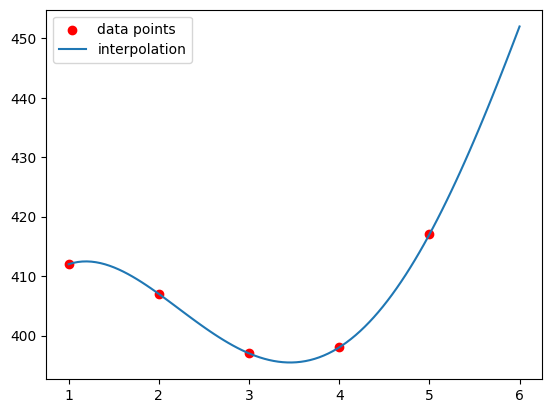

In [7]:
# Problem 1.2.1 using Lagrange Interpolation

ts = [1, 2, 3, 4, 5]
ys = [412, 407, 397, 398, 417]
    
def interp(t):
    y = 0
    for i in range(len(ys)):
        L = 1
        for j in range(len(ys)):
            if (i != j):
                L *= (t - ts[j]) / (ts[i] - ts[j])

        y += ys[i] * L

    return y

print("t = 6, P_4(t=6) = {}".format(interp(6)))

plt.scatter(ts, ys, color='red', label='data points')
plt.plot(np.linspace(1, 6, 100), interp(np.linspace(1, 6, 100)), label="interpolation")
plt.legend()
plt.show()

Coefficients of the equation are: [435.4        -25.18571429   4.21428571]
Q_2(t=6) = 435.9999999999975


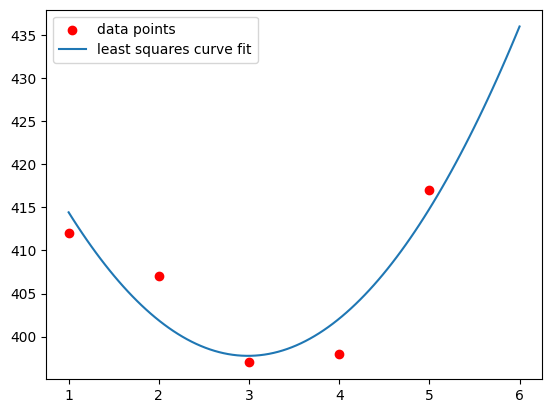

In [8]:
# Problem 1.2.2: Least Squares Curve Fitting

# a0 + a1(t) + a2(t^2) = Q(t)
# a0 + a1(1) + a2(1) = 412
# a0 + a1(2) + a2(4) = 407
# a0 + a1(3) + a2(9) = 397
# a0 + a1(4) + a2(16) = 398
# a0 + a1(5) + a2(25) = 417

A = [[1, 1, 1],
     [1, 2, 4],
     [1, 3, 9],
     [1, 4, 16],
     [1, 5, 25]]

A_t = np.transpose(A)

b = [412, 407, 397, 398, 417]

x = np.linalg.solve(np.matmul(A_t, A), np.matmul(A_t, b))

print("Coefficients of the equation are: {}".format(x))

def Q(t):
    return x[0] + x[1]*t + x[2] * t**2

print("Q_2(t=6) = {}".format(Q(6)))

plt.scatter(range(1, 6), b, color='red', label='data points')
plt.plot(np.linspace(1, 6, 100), Q(np.linspace(1, 6, 100)), label="least squares curve fit")
plt.legend()
plt.show()